In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import sqlite3
import SQL_queris as w

import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot ## For offline mode.
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt ##Again, visualizatoin.

colors = ["#8c0404","#f25ed0","#000000","#16A085","#34495E",
           "#21618C ","#512E5F","#45B39D","#AAB7B8 ","#20B2AA",
           "#FF69B4","#00CED1","#FF7F50","#7FFF00","#DA70D6"]


In [4]:
tracks_zip_file_path = './data/tracks.csv.zip'
artists_zip_file_path = './data/artists.csv.zip'
grammy_zip_file_path = './data/the_grammy_awards.csv.zip'
spotify2023_zip_path = './data/spotify-2023.csv.zip'

tracks_csv_file = 'tracks.csv'
artists_csv_file = 'artists.csv'
grammyWinners_csv_file = 'the_grammy_awards.csv'
spotify2023_tracks_csv_file = 'spotify-2023.csv'

with zipfile.ZipFile(spotify2023_zip_path, 'r') as p:
    with p.open(spotify2023_tracks_csv_file) as i:
        spotify2023_tracks = pd.read_csv(i, encoding='latin1')
        spotify2023_tracks.to_csv('spotify2023_tracks.csv')

with zipfile.ZipFile(tracks_zip_file_path, 'r') as z:
    with z.open(tracks_csv_file) as f:
        tracks = pd.read_csv(f)
        tracks.to_csv('tracks.csv')

with zipfile.ZipFile(artists_zip_file_path, 'r') as q:
    with q.open(artists_csv_file) as g:
        artists = pd.read_csv(g)
        artists.to_csv('artists.csv')

with zipfile.ZipFile(grammy_zip_file_path, 'r') as b:
    with b.open(grammyWinners_csv_file) as c:
        grammyWinners = pd.read_csv(c)
        grammyWinners.to_csv('the_grammy_awards.csv')


spotify_data_files = ['tracks.csv', 'artists.csv', 'the_grammy_awards.csv', 'spotify2023_tracks.csv']





In [32]:
# spotify2023_tracks = pd.read_csv(spotify2023_zip_path, encoding='latin1')
# spotify2023_tracks.head()

In [5]:
def create_sql_database(spotify_data_files, db_name):
    conn =sqlite3.connect(db_name)

    for file in spotify_data_files:
        df = pd.read_csv(file, low_memory=False)
        df.to_sql(name=file.replace('.csv', ''), con=conn)
    conn.commit()
    conn.close()
    

In [6]:
create_sql_database(spotify_data_files, 'Spotify_data.db')


In [7]:
table_test_query = """
    SELECT name FROM sqlite_master 
    WHERE type='table';
    """
conn = sqlite3.connect('Spotify_data.db')
cur = conn.cursor()
cur.execute(table_test_query)
print("List of tables\n")
# printing all tables list
print(cur.fetchall())

List of tables

[('tracks',), ('artists',), ('the_grammy_awards',), ('spotify2023_tracks',)]


In [8]:

spotify_DF = pd.read_sql_query(w.spotify_tracks_data_query, conn)

spotify_DF.head()


,index,Unnamed: 0,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,0,0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,...,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,1,1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,...,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,2,2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,...,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,3,3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,...,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,4,4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,...,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


In [9]:
pd.concat([artists, spotify_DF])

,id,followers,genres,name,popularity,index,Unnamed: 0,duration_ms,explicit,artists,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,0DheY5irMjBUeLybbCUEZ2,0.0,[],Armid & Amir Zare Pashai feat. Sara Rouzbehani,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0DlhY15l3wsrnlfGio2bjU,5.0,[],ปูนา ภาวิณี,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0DmRESX2JknGPQyO15yxg7,0.0,[],Sadaa,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0DmhnbHjm1qw6NCYPeZNgJ,0.0,[],Tra'gruda,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0Dn11fWM7vHQ3rinvWEl4E,2.0,[],Ioannis Panoutsopoulos,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586667,5rgu12WBIHQtvej2MdHSH0,NaN,NaN,云与海,50,586667.0,586667.0,258267.0,0.0,['阿YueYue'],...,0.0,-7.471,0.0,0.0292,0.785,0.000000,0.0648,0.2110,131.896,4.0
586668,0NuWgxEp51CutD2pJoF4OM,NaN,NaN,blind,72,586668.0,586668.0,153293.0,0.0,['ROLE MODEL'],...,0.0,-5.223,1.0,0.0652,0.141,0.000297,0.0924,0.6860,150.091,4.0
586669,27Y1N4Q4U3EfDU5Ubw8ws2,NaN,NaN,What They'll Say About Us,70,586669.0,586669.0,187601.0,0.0,['FINNEAS'],...,7.0,-12.823,0.0,0.0408,0.895,0.000150,0.0874,0.0663,145.095,4.0
586670,45XJsGpFTyzbzeWK8VzR8S,NaN,NaN,A Day At A Time,58,586670.0,586670.0,142003.0,0.0,"['Gentle Bones', 'Clara Benin']",...,10.0,-6.212,1.0,0.0345,0.206,0.000003,0.3050,0.4380,90.029,4.0


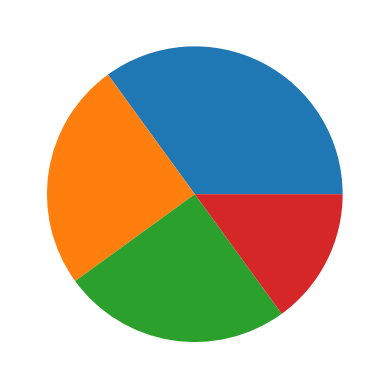

In [10]:
y = np.array([35, 25, 25, 15])

plt.pie(y)
plt.show() 

In [11]:
data = pd.read_csv('./spotify2023_tracks.csv')
data.head()

,Unnamed: 0,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,...,125,B,Major,80,89,83,31,0,8,4
1,1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,...,92,C#,Major,71,61,74,7,0,10,4
2,2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,...,138,F,Major,51,32,53,17,0,31,6
3,3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,...,170,A,Major,55,58,72,11,0,11,15
4,4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,...,144,A,Minor,65,23,80,14,63,11,6


In [40]:
data1 = pd.read_csv('./tracks.csv')
data1.head()

,Unnamed: 0,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,...,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,...,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,...,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,...,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,...,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


In [41]:
data2 = pd.read_csv('./artists.csv')
data2.head()

,Unnamed: 0,id,followers,genres,name,popularity
0,0,0DheY5irMjBUeLybbCUEZ2,0.0,[],Armid & Amir Zare Pashai feat. Sara Rouzbehani,0
1,1,0DlhY15l3wsrnlfGio2bjU,5.0,[],ปูนา ภาวิณี,0
2,2,0DmRESX2JknGPQyO15yxg7,0.0,[],Sadaa,0
3,3,0DmhnbHjm1qw6NCYPeZNgJ,0.0,[],Tra'gruda,0
4,4,0Dn11fWM7vHQ3rinvWEl4E,2.0,[],Ioannis Panoutsopoulos,0


In [42]:
data3 = pd.read_csv('./the_grammy_awards.csv')
data3.head()

,Unnamed: 0,year,title,published_at,updated_at,category,nominee,artist,workers,img,winner
0,0,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Record Of The Year,Bad Guy,Billie Eilish,"Finneas O'Connell, producer; Rob Kinelski & Fi...",https://www.grammy.com/sites/com/files/styles/...,True
1,1,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Record Of The Year,"Hey, Ma",Bon Iver,"BJ Burton, Brad Cook, Chris Messina & Justin V...",https://www.grammy.com/sites/com/files/styles/...,True
2,2,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Record Of The Year,7 rings,Ariana Grande,"Charles Anderson, Tommy Brown, Michael Foster ...",https://www.grammy.com/sites/com/files/styles/...,True
3,3,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Record Of The Year,Hard Place,H.E.R.,"Rodney “Darkchild” Jerkins, producer; Joseph H...",https://www.grammy.com/sites/com/files/styles/...,True
4,4,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Record Of The Year,Talk,Khalid,"Disclosure & Denis Kosiak, producers; Ingmar C...",https://www.grammy.com/sites/com/files/styles/...,True


In [43]:
data.describe()

,Unnamed: 0,artist_count,Year,Month,Day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,476.000000,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,67.812172,51.908709,2.666317,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,275.251703,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,86.441493,50.630241,6.035599,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,0.000000,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,238.000000,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,13.000000,7.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,476.000000,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,34.000000,38.000000,0.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,714.000000,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,88.000000,87.000000,2.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,952.000000,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,672.000000,275.000000,58.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


In [45]:
print(f"Number of column :{data.shape[1]}\nNumber of rows :{data.shape[0]}")

Number of column :25
Number of rows :953


In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Unnamed: 0            953 non-null    int64 
 1   track_name            953 non-null    object
 2   artist(s)_name        953 non-null    object
 3   artist_count          953 non-null    int64 
 4   Year                  953 non-null    int64 
 5   Month                 953 non-null    int64 
 6   Day                   953 non-null    int64 
 7   in_spotify_playlists  953 non-null    int64 
 8   in_spotify_charts     953 non-null    int64 
 9   streams               953 non-null    object
 10  in_apple_playlists    953 non-null    int64 
 11  in_apple_charts       953 non-null    int64 
 12  in_deezer_playlists   953 non-null    object
 13  in_deezer_charts      953 non-null    int64 
 14  in_shazam_charts      953 non-null    object
 15  bpm                   953 non-null    in

In [47]:
print(f"number of artists '{data['artist(s)_name'].nunique()}'")

number of artists '645'


In [48]:
artist_counts = data['artist(s)_name'].value_counts()
artist_counts

artist(s)_name
Taylor Swift                 34
The Weeknd                   22
Bad Bunny                    19
SZA                          19
Harry Styles                 17
                             ..
Karol G, Ovy On The Drums     1
Coolio, L.V.                  1
Kordhell                      1
Kenia OS                      1
Feid, Sech, Jhayco            1
Name: count, Length: 645, dtype: int64

In [52]:
iplot(px.bar(artist_counts[:15],
             text_auto = True,
             color = artist_counts[:15].index,
             color_discrete_sequence = colors, 
             labels=dict(index="Count Names",value="Count"),
             title = 'Top 15 Artists with Most Songs'
            ))

In [53]:
artist_counts.head(20)

artist(s)_name
Taylor Swift        34
The Weeknd          22
Bad Bunny           19
SZA                 19
Harry Styles        17
Kendrick Lamar      12
Morgan Wallen       11
Ed Sheeran           9
BTS                  8
Feid                 8
Drake, 21 Savage     8
Labrinth             7
Olivia Rodrigo       7
NewJeans             6
Doja Cat             6
Billie Eilish        5
Drake                4
IVE                  4
Arctic Monkeys       4
Karol G              4
Name: count, dtype: int64

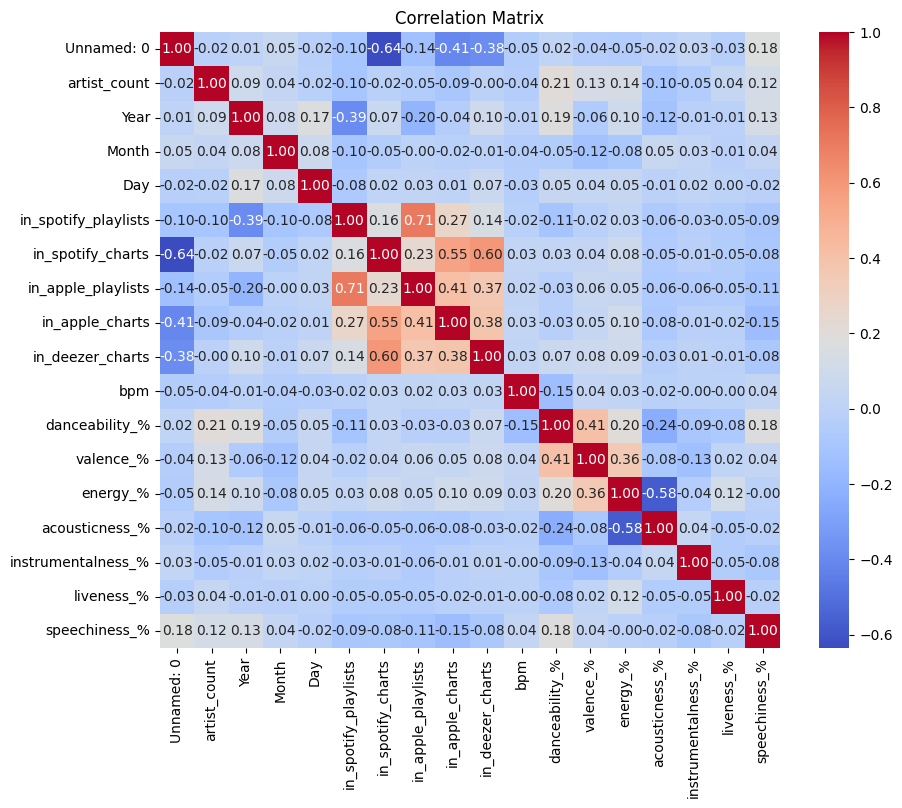

In [54]:
numeric_df = data.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the correlation matrix using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [67]:
songs_by_year = data['Year'].value_counts()
songs_by_year.columns = ['Year', 'count']
songs_by_year

Year
2022    402
2023    175
2021    119
2020     37
2019     36
2017     23
2016     18
2014     13
2013     13
2015     11
2018     10
2012     10
2011     10
2010      7
2002      6
1999      5
1984      4
2000      4
2004      4
1963      3
1958      3
1995      2
1970      2
1959      2
1985      2
1957      2
1986      2
2003      2
1991      2
2008      2
1975      2
1982      2
1946      1
2005      1
1942      1
1996      1
1998      1
1950      1
1979      1
2007      1
1952      1
1971      1
1994      1
1930      1
1973      1
1997      1
1968      1
1992      1
1983      1
1987      1
Name: count, dtype: int64

<Axes: >

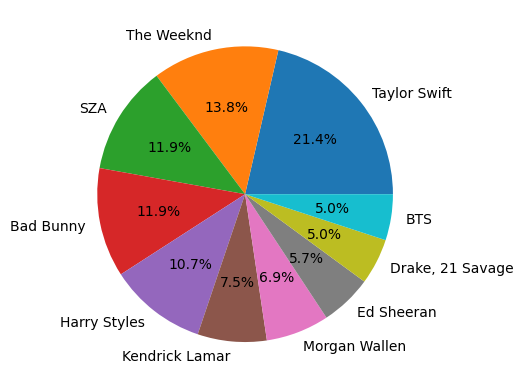

In [71]:
data['artist(s)_name'].sort_values().value_counts().nlargest(10).plot(kind='pie',ylabel = "", autopct='%1.1f%%')